# Exploratory Data Analysis - Dyspnea dataset

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

## Dyspnea scale
This dataset contains the information of 137 patients, where their id, date test and dyspnea scale is stored. 

In [17]:
dyspnea = pd.read_excel(f'./Data/Disnea.xlsx')
df_cp = dyspnea.copy()
df_cp.rename(columns={
    'id':'id_paciente',
    'FE_ALTA':'FE_ALTA',
    'Examen':'Examen'
},inplace = True)

# Convert to lowercase 
df_cp.columns = [col.lower() for col in df_cp.columns]
df_cp

,id_paciente,fe_alta,examen
0,1998401,2016-06-02,ESCALA DE DISNEA mMRC EPOC 0
1,1491934,2016-06-10,ESCALA DE DISNEA mMRC EPOC 0
2,801004,2019-07-12,ESCALA DE DISNEA mMRC EPOC 0
3,1226479,2019-07-26,ESCALA DE DISNEA mMRC EPOC 0
4,1241688,2016-09-01,ESCALA DE DISNEA mMRC EPOC 0
...,...,...,...
132,1690591,2016-03-08,ESCALA DE DISNEA mMRC EPOC 4
133,1690591,2016-06-01,ESCALA DE DISNEA mMRC EPOC 4
134,1718360,2016-12-13,ESCALA DE DISNEA mMRC EPOC 4
135,1718360,2018-03-20,ESCALA DE DISNEA mMRC EPOC 4


In [19]:
df_cp.groupby(['examen','fe_alta']).count()

id_paciente
examen                       fe_alta                
ESCALA DE DISNEA mMRC EPOC 0 2016-06-02            1
                             2016-06-10            1
                             2016-09-01            1
                             2019-07-06            1
                             2019-07-12            1
...                                              ...
ESCALA DE DISNEA mMRC EPOC 4 2018-02-26            1
                             2018-03-20            1
                             2018-04-09            1
                             2018-05-10            1
                             2019-07-12            1

[125 rows x 1 columns]

There are 4 different categories, therefore we can convert them to categorical type for the final dataset

In [48]:
df_cp['examen'].replace("ESCALA DE DISNEA mMRC EPOC 0","0",inplace=True)

df_cp['examen'].replace("ESCALA DE DISNEA mMRC EPOC 1","1",inplace=True)

df_cp['examen'].replace("ESCALA DE DISNEA mMRC EPOC 2","2",inplace=True)

df_cp['examen'].replace("ESCALA DE DISNEA mMRC EPOC 3","3",inplace=True)

df_cp['examen'].replace("ESCALA DE DISNEA mMRC EPOC 4","4",inplace=True)

# Conver to categorical data (scale 0-4)

df_cp['examen'] = df_cp['examen'].astype('category')

df_cp.groupby('examen').count()
df_cp['examen'].unique()

[0, 1, 2, 3, 4]
Categories (5, object): [0, 1, 2, 3, 4]

In [8]:
print(max(dyspnea_copy['FE_ALTA']))
print(min(dyspnea_copy['FE_ALTA']))

2019-07-26 00:00:00
2015-06-13 00:00:00


In [23]:
a = df_cp.groupby(['id_paciente']).count()
df_cp.columns

Index(['id_paciente', 'fe_alta', 'examen'], dtype='object')

In [26]:
df_cp

,id_paciente,fe_alta,examen
0,1998401,2016-06-02,0
1,1491934,2016-06-10,0
2,801004,2019-07-12,0
3,1226479,2019-07-26,0
4,1241688,2016-09-01,0
...,...,...,...
132,1690591,2016-03-08,4
133,1690591,2016-06-01,4
134,1718360,2016-12-13,4
135,1718360,2018-03-20,4


Text(0, 0.5, 'Number of patients')

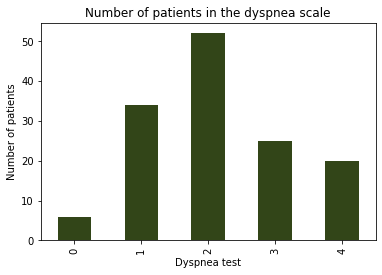

In [44]:
ax = df_cp[["id_paciente", 'examen']].groupby('examen').size().plot(kind='bar', color='#324518')
ax.set_title("Number of patients in the dyspnea scale")
ax.set_xlabel('Dyspnea test')
ax.set_ylabel('Number of patients')




In [32]:
print("Number of records : {0}".format(df_cp.shape))
print("N")

Number of records : (137, 3)


In [93]:

zero_scale = df_cp[df_cp['examen']=='0'].count()
zero_scale1 = df_cp[df_cp['examen']=='1'].count()
zero_scale2 = df_cp[df_cp['examen']=='2'].count()
zero_scale3 = df_cp[df_cp['examen']=='3'].count()
zero_scale4 = df_cp[df_cp['examen']=='4'].count()
frame = [zero_scale[0],zero_scale1[0],zero_scale2[0],zero_scale3[0],zero_scale4[0]]
frame

[6, 34, 52, 25, 20]

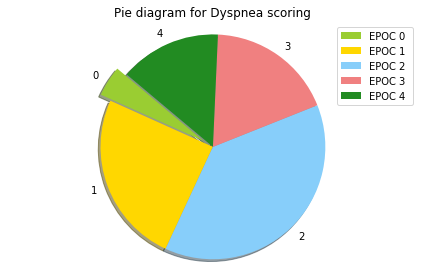

In [120]:
import matplotlib.pyplot as plt

labels = ['0', '1', '2', '3','4']
labels2 = 'EPOC 0', 'EPOC 1 ', 'EPOC 2', 'EPOC 3','EPOC 4'
sizes = frame
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','forestgreen']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

patches, texts = plt.pie(sizes,  explode=explode, labels=labels, colors=colors,  shadow=True, startangle=500)
plt.legend(patches, labels2, loc="best")
plt.title("Pie diagram for Dyspnea scoring")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [121]:
df_cp.to_csv('./data/cleansed/disnea.csv', sep='|')